In [1]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut, GridSearchCV
from sklearn.pipeline import Pipeline

from medidas_desempeno_biclase import calcula_medidas_biclase
from matriz_biclase import imprime_matriz_biclase
from ROC_AUC import imprime_ROC_AUC
seed = 42

In [2]:
ruta = "../data/Electricity_limpio.csv"
df = pd.read_csv(ruta)
df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,class
0,0.966098,0.833333,0.680851,0.133967,0.434577,1
1,0.940816,0.333333,0.148936,0.133387,0.217193,0
2,0.135606,0.666667,0.446809,0.163919,0.623177,1
3,0.915342,1.000000,0.936170,0.139655,0.513160,1
4,0.974717,1.000000,0.319149,0.106919,0.227607,1


## Vamos a usar un Knn para rápido, pero con un LOO en un Grid para buscar bien los vecinos

In [3]:
X = df.drop(columns = ['class'])
y = df['class']

In [4]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
loo = LeaveOneOut()
params = {'n_neighbors':[7]}
medidas = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

grid = GridSearchCV(
    estimator = knn_model,
    param_grid = params,
    cv = loo,
    scoring = medidas,
    refit = 'accuracy',
    n_jobs = -1)

grid.fit(X, y)

/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anaconda3/envs/CIP/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jair/anacon

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(n_neighbors=3),
             n_jobs=-1, param_grid={'n_neighbors': [7]}, refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

## Predicciones para obtener las medidas

In [5]:
y_pred = grid.best_estimator_.predict(X)
df_medidas = calcula_medidas_biclase(y, y_pred)

In [6]:
df_medidas

,Medida,Valor
0,Accuracy,0.924167
1,Error Rate,0.075833
2,Recall (Sensitivity),0.895876
3,Specificity,0.943357
4,Balanced Accuracy,0.919616
5,Precision,0.914737
6,F1 Score,0.905208
7,MCC,0.842152


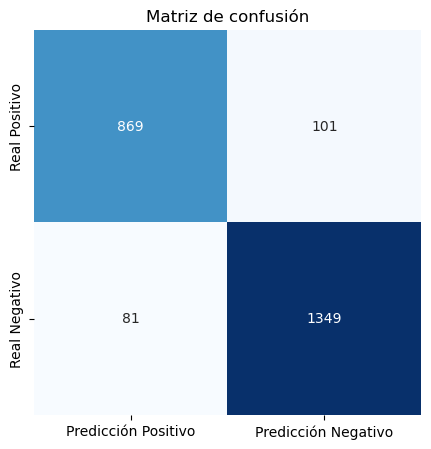

In [7]:
imprime_matriz_biclase(y, y_pred)

## Curva ROC- AUC

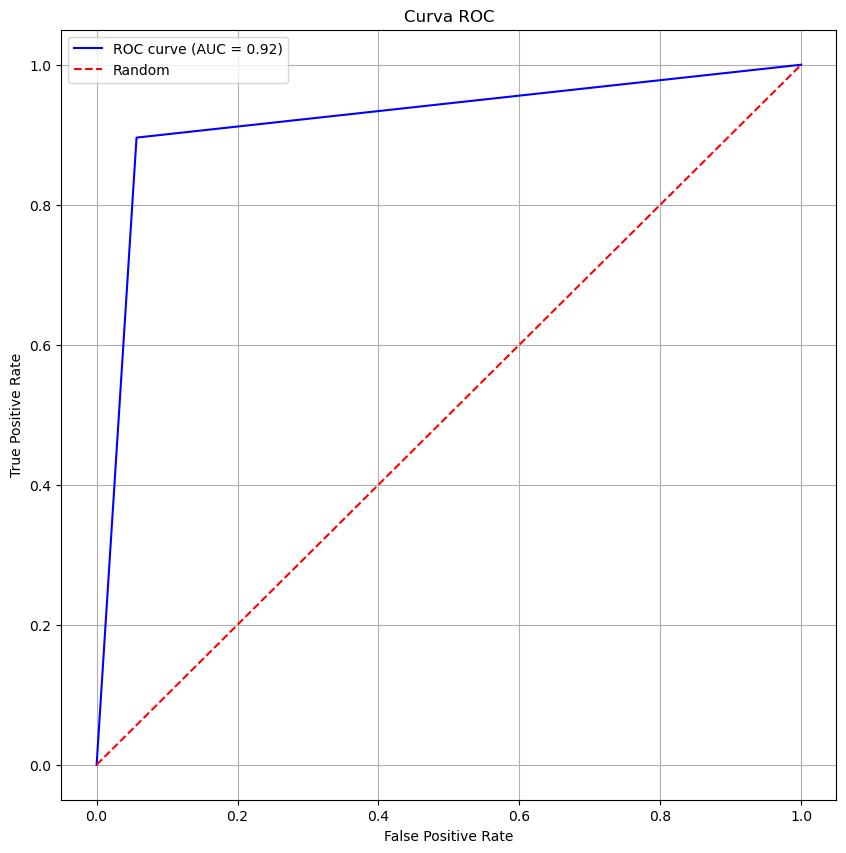

In [ ]:
y_pred_proba = grid.best_estimator_.predict_proba(X)[:, 1]
imprime_ROC_AUC(y, y_pred_proba)